In [6]:
#dans ce noteboock, j'analyserai la quantité de victoires par pays, \
#comparant ensuite ces résultats avec le niveau économique de chacun de ces pays (tableau externe)


In [170]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [45]:
import pprint
import sqlite3 as sql

In [47]:
cn= sql.connect('C:/Users/Yoan Vicente/Documents/Application methodes/Automobilistes/conducteurs.db')

In [48]:
cursor = cn.cursor()

In [49]:
cursor.execute("SELECT * FROM Driver")

In [198]:
query = """
SELECT
    Nationality AS Nationality,
    SUM(Wins) AS Total_Wins
FROM
    Driver
GROUP BY
    Nationality
ORDER BY
    Total_Wins DESC;
"""

In [199]:
df = pd.read_sql_query(query, cn)

In [200]:
gdp= pd.read_csv('C:/Users/Yoan Vicente/Documents/Dossier_python/GDP_per_capita.csv')

In [201]:
merged_df= pd.merge(df, gdp, left_on='Nationality', right_on='Country')

In [202]:
merged_df['GDP_per_capita'] = pd.to_numeric(merged_df['GDP_per_capita'])
filtered_df = merged_df[merged_df['Total_Wins'] > 0]

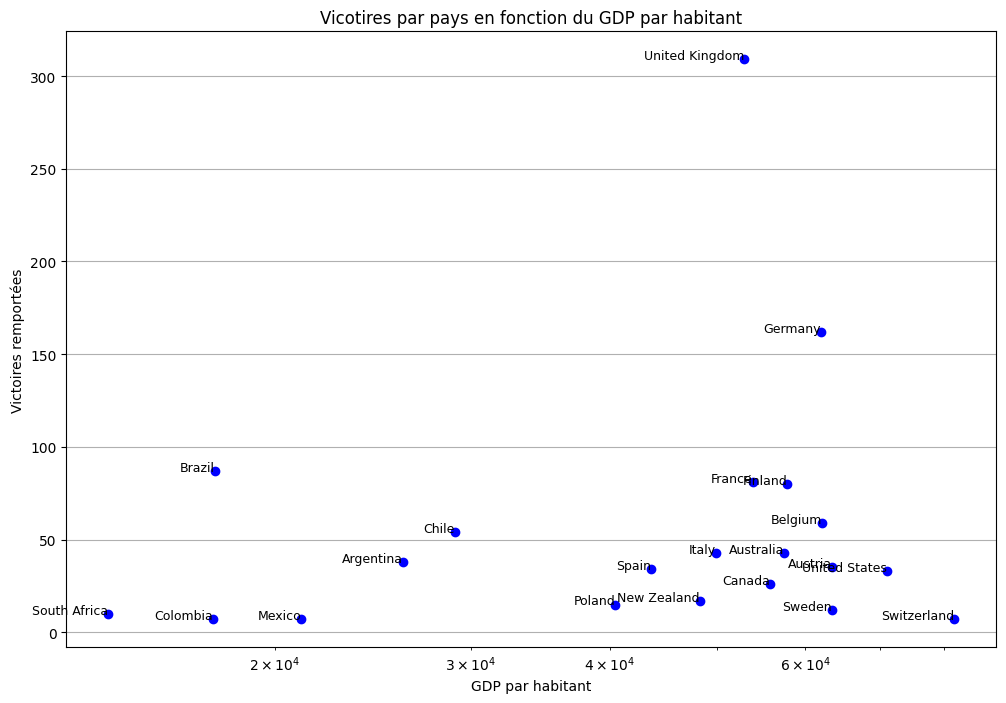

In [204]:
plt.figure(figsize=(12, 8))
plt.scatter(filtered_df['GDP_per_capita'], filtered_df['Total_Wins'], color='blue')

for i, row in filtered_df.iterrows():
    plt.annotate(row['Nationality'], 
                 (row['GDP_per_capita'], row['Total_Wins']),
                 fontsize=9,
                 ha='right')

plt.title('Vicotires par pays en fonction du GDP par habitant')
plt.xlabel('GDP par habitant')
plt.ylabel('Victoires remportées')
plt.xscale('log')
plt.grid(True)
plt.show()

In [206]:
correlation = merged_df[['GDP_per_capita', 'Total_Wins']].corr().iloc[0, 1]
print("correlation=",correlation)

correlation= 0.17086769251509096
